#Q1: Handling missing or incorrect data in the dataset

In [ ]:
import pandas as pd

file_path = 'dataset.csv'
dataset = pd.read_csv(file_path)

#First few rows of dataset
dataset_info = dataset.info()
dataset_head = dataset.head()
dataset_info, dataset_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     337 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                328 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


(None,
   species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
 0  Adelie  Torgersen            39.1           18.7              181.0   
 1  Adelie  Torgersen            39.5           17.4              186.0   
 2  Adelie  Torgersen            40.3           18.0              195.0   
 3  Adelie  Torgersen             NaN            NaN                NaN   
 4  Adelie  Torgersen            36.7           19.3              193.0   
 
    body_mass_g     sex  
 0       3750.0    male  
 1       3800.0  female  
 2       3250.0  female  
 3          NaN     NaN  
 4       3450.0  female  )

After cleaning the data

In [ ]:
# Filling missing numerical data with the column mean
numerical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
for col in numerical_columns:
    dataset[col] = dataset[col].fillna(dataset[col].mean())

# Fill missing categorical data with the mode
categorical_columns = ['sex']
for col in categorical_columns:
    dataset[col] = dataset[col].fillna(dataset[col].mode()[0])

# Verify the cleaned dataset
cleaned_info = dataset.info()
cleaned_head = dataset.head()
cleaned_info, cleaned_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     344 non-null    float64
 3   bill_depth_mm      344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


(None,
   species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
 0  Adelie  Torgersen       39.100000       18.70000         181.000000   
 1  Adelie  Torgersen       39.500000       17.40000         186.000000   
 2  Adelie  Torgersen       40.300000       18.00000         195.000000   
 3  Adelie  Torgersen       43.876855       17.15117         200.915205   
 4  Adelie  Torgersen       36.700000       19.30000         193.000000   
 
    body_mass_g     sex  
 0  3750.000000    male  
 1  3800.000000  female  
 2  3250.000000  female  
 3  4273.976608    male  
 4  3450.000000  female  )

# EXPLANATION:

1.**Analyze the Dataset:**
First I analyze the dataset to understand its structure, types of data (numerical or categorical), and whether there are any missing or incorrect values.

2.**Identify Missing Data**:
Check if there are any missing values in the dataset. Missing data can be in both numerical and categorical columns. Look for columns with null or NaN values.

3.**Handle Missing Numerical Data:**
For numerical columns with missing values, I can replace the missing data with the mean of that column.

4.**Handle Missing Categorical Data**:
For categorical columns with missing values, fill the missing entries with the mode (the most frequent category) of that column.

5.**Verify the Data:**
After handling missing and incorrect data, check the dataset again to make sure there are no remaining missing values and that all values make sense.





# Q2:Calculating average body_mass_g for Gentoo penguins

In [ ]:

gentoo_penguins = dataset[dataset['species'] == 'Gentoo']

# Calculating average body mass
average_body_mass_gentoo = gentoo_penguins['body_mass_g'].mean()

print(f"The average body mass for Gentoo penguins is: {average_body_mass_gentoo:.2f} g")


The average body mass for Gentoo penguins is: 5126.81 g


# Q3:The distributuion of bill_length_mm and bill_depth_mm differ between the three penguin species

     species         feature  skewness  kurtosis
0     Adelie  bill_length_mm  0.162533 -0.228104
1     Adelie   bill_depth_mm  0.329209 -0.101072
2  Chinstrap  bill_length_mm -0.095936 -0.124011
3  Chinstrap   bill_depth_mm  0.006726 -0.898740
4     Gentoo  bill_length_mm  0.712323  1.147647
5     Gentoo   bill_depth_mm  0.334623 -0.611126


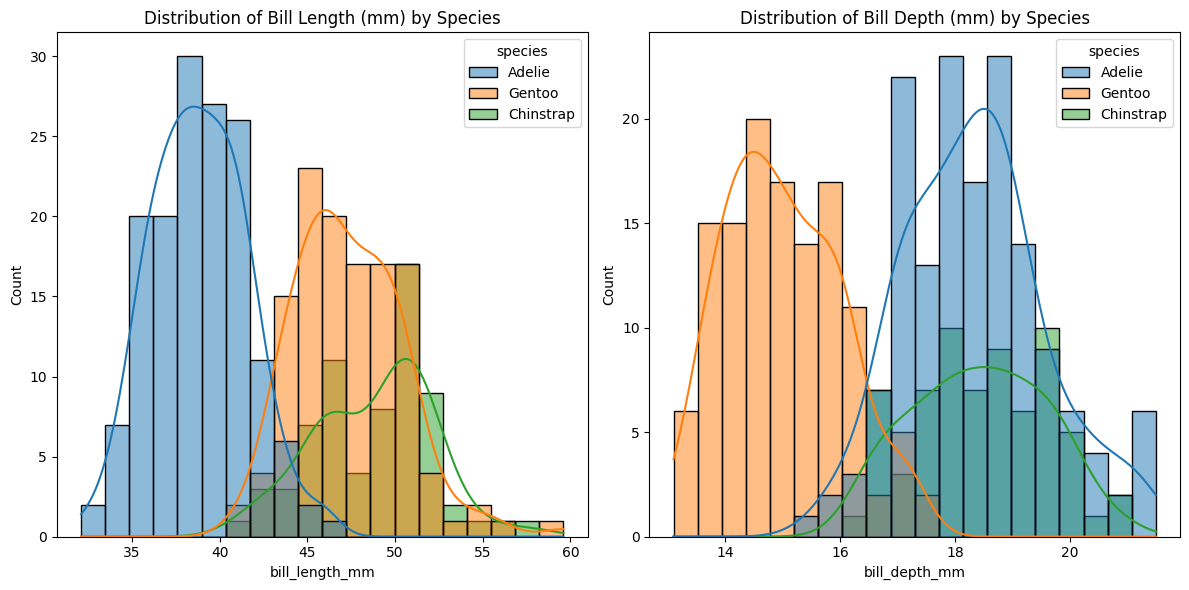

In [ ]:
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import seaborn as sns


species_groups = dataset.groupby('species')

results = {'species': [], 'feature': [], 'skewness': [], 'kurtosis': []}

for species, group in species_groups:
    for feature in ['bill_length_mm', 'bill_depth_mm']:
        results['species'].append(species)
        results['feature'].append(feature)
        results['skewness'].append(skew(group[feature].dropna()))
        results['kurtosis'].append(kurtosis(group[feature].dropna()))


results_df = pd.DataFrame(results)

print(results_df)


plt.figure(figsize=(12, 6))

# Plot bill_length_mm
plt.subplot(1, 2, 1)
sns.histplot(data=dataset, x='bill_length_mm', hue='species', kde=True, bins=20)
plt.title('Distribution of Bill Length (mm) by Species')

# Plot bill_depth_mm
plt.subplot(1, 2, 2)
sns.histplot(data=dataset, x='bill_depth_mm', hue='species', kde=True, bins=20)
plt.title('Distribution of Bill Depth (mm) by Species')

plt.tight_layout()
plt.show()


# EXPLANATION

**Steps:**

**1.Group Data by Species:** I Divide the dataset based on species.

**2.Calculate Skewness and Kurtosis:** Use statistical functions to compute these metrics for each feature within each species.

**->Skewness**: Indicates the asymmetry of the distribution.

**->Kurtosis:** Indicates the "tailedness" of the distribution.

**3.Visualize Distributions:**
 Use plots like histograms or boxplots to compare distributions visually.

# Q4.Detect and visualize the outliers

bill_length_mm: 0 outliers detected
bill_depth_mm: 0 outliers detected
flipper_length_mm: 0 outliers detected
body_mass_g: 3 outliers detected


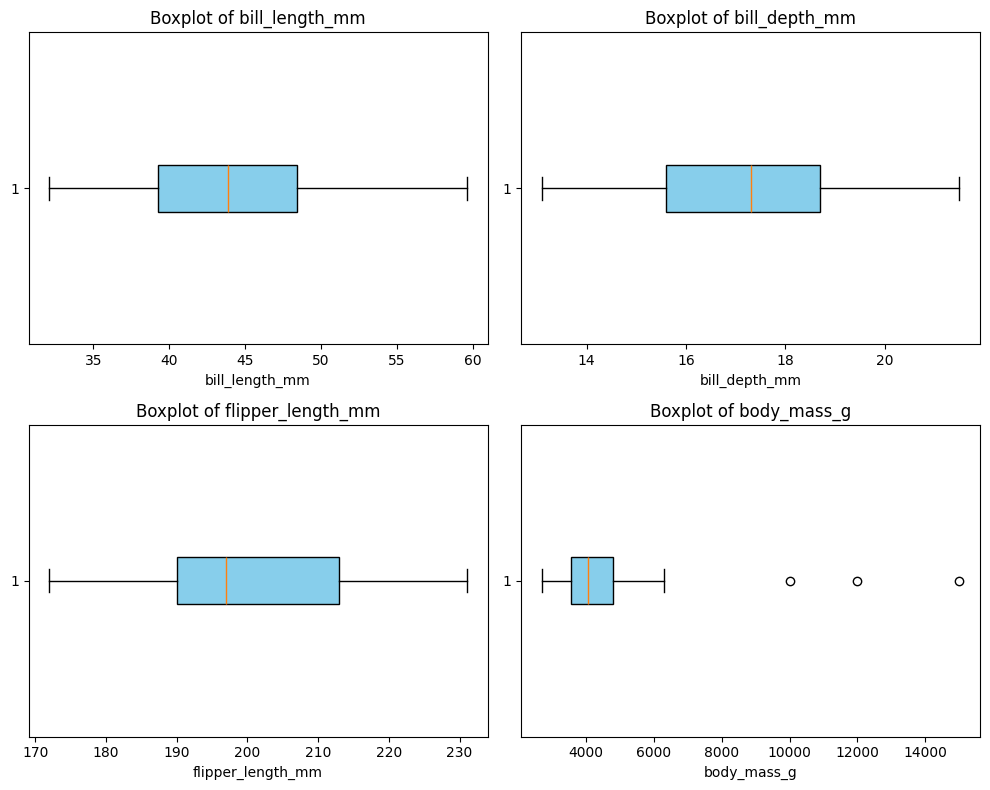

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Identify numerical features
numerical_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Create a DataFrame to store outlier information
outlier_info = {}

# Calculate IQR and detect outliers for each numerical feature
for feature in numerical_features:
    Q1 = dataset[feature].quantile(0.25)
    Q3 = dataset[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = dataset[(dataset[feature] < lower_bound) | (dataset[feature] > upper_bound)]
    outlier_info[feature] = len(outliers)

    print(f"{feature}: {len(outliers)} outliers detected")

# Visualize outliers with boxplots
plt.figure(figsize=(10, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    plt.boxplot(dataset[feature].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()


# EXPLANATION

**Steps to Detect Outliers:**

1.Calculate the IQR:

->First, find the 25th percentile (Q1) and 75th percentile (Q3) of the data for each feature.

->The IQR is the difference between Q3 and Q1:

     IQR=Q3-Q1

2.Identify Outlier Thresholds:

->Data points that are too far from the main cluster are considered outliers. I identify outliers by looking for values outside the following ranges:

Lower threshold: Q1-1.5* IQR

Upper threshold: Q3+1.5* IQR

->Any values below the lower threshold or above the upper threshold are outliers.

3.Visualize Outliers:
Use boxplots to show the distribution of the data. These plots highlight outliers as points that fall outside the normal range of values (below the lower threshold or above the upper threshold).






# Q5.PCA

Principal Component 1: 0.62
Principal Component 2: 0.20
Principal Component 3: 0.13
Principal Component 4: 0.05


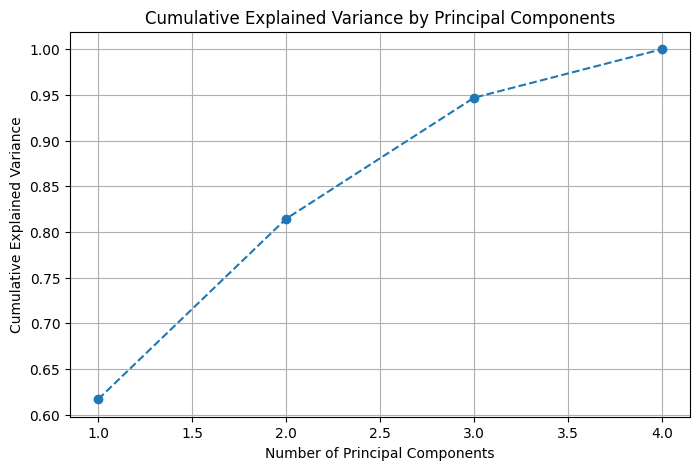

Reduced data shape: (344, 2)


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


numerical_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']


scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset[numerical_features].dropna())

#  Perform PCA
pca = PCA(n_components=len(numerical_features))
pca_result = pca.fit_transform(scaled_data)


explained_variance = pca.explained_variance_ratio_


cumulative_variance = explained_variance.cumsum()


for i, var in enumerate(explained_variance):
    print(f"Principal Component {i+1}: {var:.2f}")

# Plotting the grapgh
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()


optimal_pca = PCA(n_components=2)
reduced_data = optimal_pca.fit_transform(scaled_data)
print(f"Reduced data shape: {reduced_data.shape}")


# EXPLANATION

1.Dimensionality Assessment:

The dataset has only 4 numerical features, which is not excessively high, so the curse of dimensionality is minimal. However, PCA can still improve performance by reducing redundancy.

2.Standardization:

Features are standardized before PCA because PCA is sensitive to the scale of features.

3.Variance Explained:

Each principal component's contribution to the dataset's variance is calculated to decide how many components to retain.

4.Visualization:

The cumulative explained variance plot helps determine the optimal number of components to retain while maintaining most of the variance.

5.Dimensionality Reduction:

Reduced the dataset to 2 principal components for simplicity.

# Q6.Using bill_length_mm vs bill_depth_mm and plot 7 different graphs.

 **1.Scatter Plot**

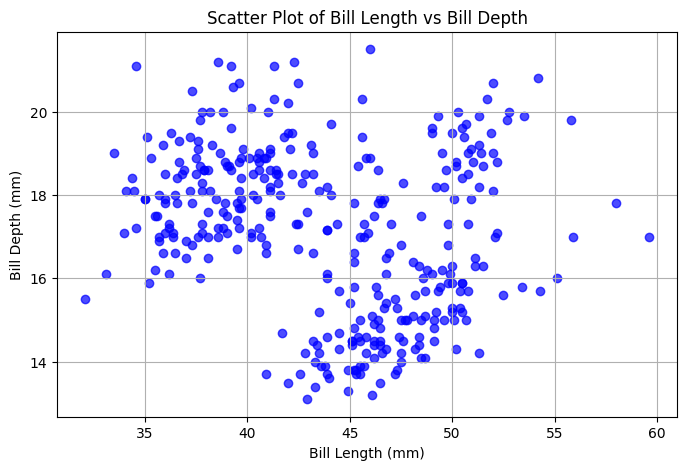

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(dataset['bill_length_mm'], dataset['bill_depth_mm'], alpha=0.7, c='blue')
plt.title('Scatter Plot of Bill Length vs Bill Depth')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.grid()
plt.show()


**2. Line Plot**

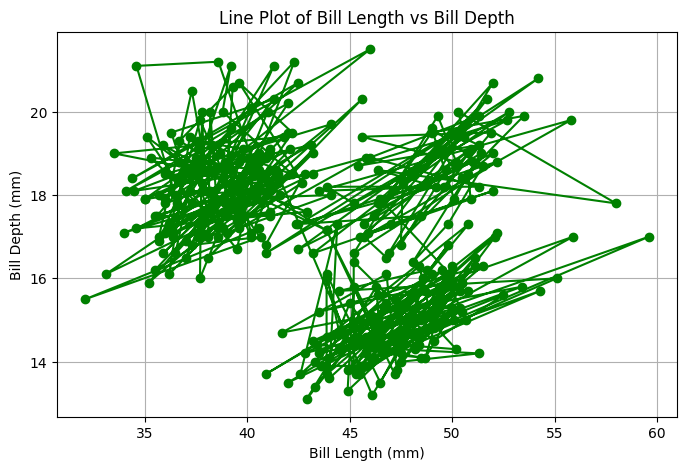

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(dataset['bill_length_mm'], dataset['bill_depth_mm'], linestyle='-', marker='o', color='green')
plt.title('Line Plot of Bill Length vs Bill Depth')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.grid()
plt.show()


 **3.Histogram (2D)**

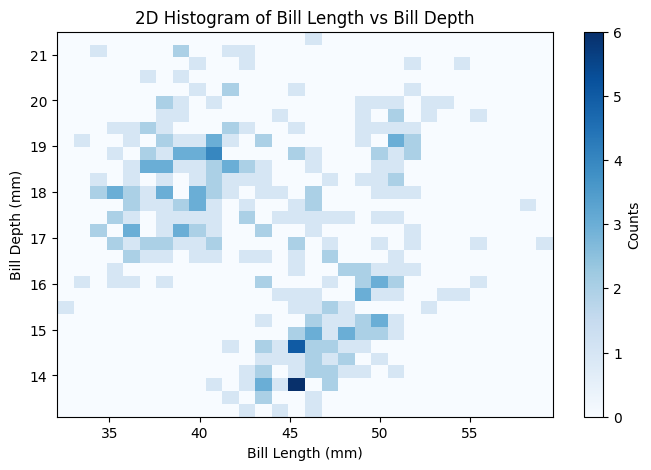

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist2d(dataset['bill_length_mm'], dataset['bill_depth_mm'], bins=30, cmap='Blues')
plt.title('2D Histogram of Bill Length vs Bill Depth')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.colorbar(label='Counts')
plt.show()


**4.Hexbin Plot**

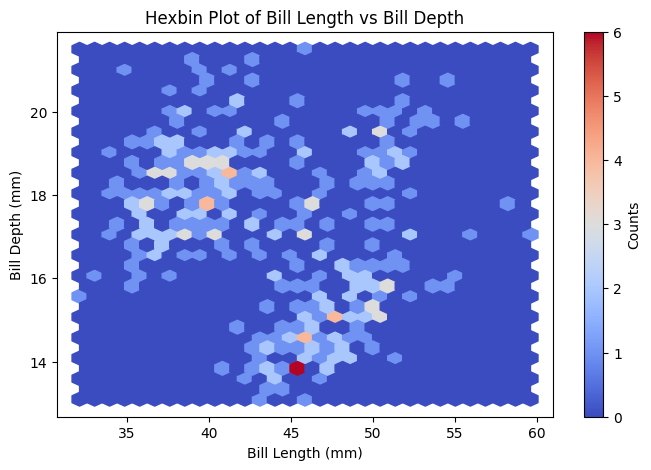

In [ ]:
plt.figure(figsize=(8, 5))
plt.hexbin(dataset['bill_length_mm'], dataset['bill_depth_mm'], gridsize=30, cmap='coolwarm')
plt.title('Hexbin Plot of Bill Length vs Bill Depth')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.colorbar(label='Counts')
plt.show()


**5. Density Plot**

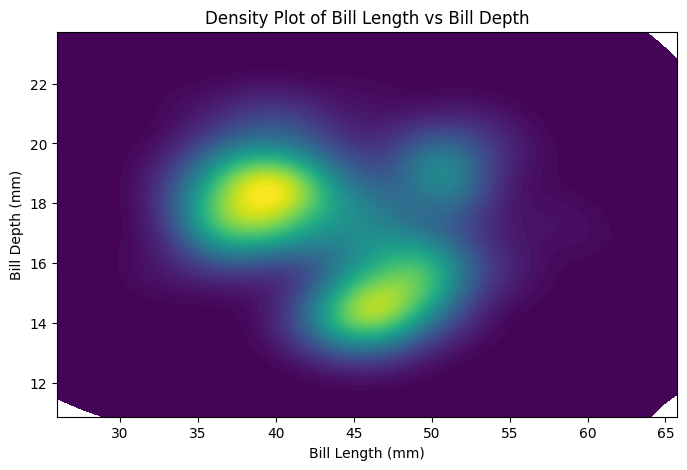

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.kdeplot(
    x=dataset['bill_length_mm'],
    y=dataset['bill_depth_mm'],
    cmap='viridis',
    fill=True,
    thresh=0,
    levels=100
)
plt.title('Density Plot of Bill Length vs Bill Depth')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()


**6.box plot**

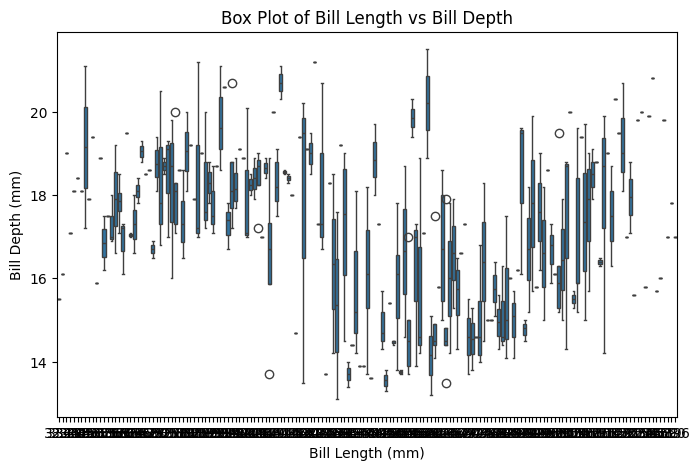

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=dataset['bill_length_mm'], y=dataset['bill_depth_mm'])
plt.title('Box Plot of Bill Length vs Bill Depth')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()


**7.Violin Plot**

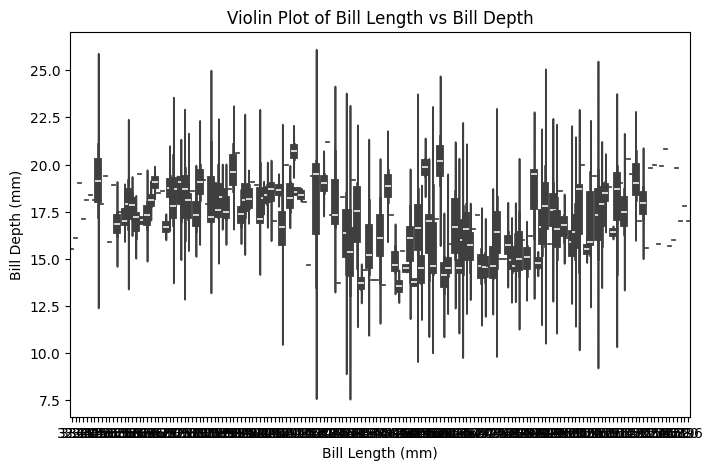

In [ ]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=dataset['bill_length_mm'], y=dataset['bill_depth_mm'])
plt.title('Violin Plot of Bill Length vs Bill Depth')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()


# Q7.Finding longest flipper on each island

In [ ]:

max_flipper_per_group = dataset.groupby(['species', 'island'])['flipper_length_mm'].max().reset_index()

longest_flippers_by_island = (max_flipper_per_group.loc[max_flipper_per_group.groupby('island')['flipper_length_mm'].idxmax()])


print("Maximum flipper length for each species and island:")
print(max_flipper_per_group)

print("\nSpecies with the longest flippers on each island:")
print(longest_flippers_by_island)


Maximum flipper length for each species and island:
     species     island  flipper_length_mm
0     Adelie     Biscoe              203.0
1     Adelie      Dream              208.0
2     Adelie  Torgersen              210.0
3  Chinstrap      Dream              212.0
4     Gentoo     Biscoe              231.0

Species with the longest flippers on each island:
     species     island  flipper_length_mm
4     Gentoo     Biscoe              231.0
3  Chinstrap      Dream              212.0
2     Adelie  Torgersen              210.0


# Q8.z-score normalization

In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']


scaler = StandardScaler()

# Apply Z-score normalization
dataset[numerical_features] = scaler.fit_transform(dataset[numerical_features])

# the first few rows of the normalized dataset
print(dataset.head())


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen       -0.882230       0.787743          -1.422488   
1  Adelie  Torgersen       -0.808355       0.126556          -1.065352   
2  Adelie  Torgersen       -0.660604       0.431719          -0.422507   
3  Adelie  Torgersen        0.000000       0.000000           0.000000   
4  Adelie  Torgersen       -1.325483       1.092905          -0.565361   

   body_mass_g     sex  
0    -0.470213    male  
1    -0.425343  female  
2    -0.918910  female  
3     0.000000    male  
4    -0.739431  female  
